In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set paths to various directories and files
path_base = os.path.dirname(os.getcwd())
path_data = os.path.join(path_base, "data")

path_train = os.path.join(path_data, "train_88_2.tsv")
path_train_aug = os.path.join(path_data, "train_88_2_aug.tsv")
path_test = os.path.join(path_data, "test_88_2.tsv")

# Read files containing sentences from disk
train = pd.read_csv(path_train, sep='\t')
train_aug = pd.read_csv(path_train_aug, sep='\t')
test = pd.read_csv(path_test, sep='\t')

class_names = np.array(['Very negative', 'Negative', 'Neutral', 'Positive', 'Very positive', 'Mixed'])

# Count how many sentences stay unaffected by augmentation
c = 0
for i, row in train_aug.iterrows():
    if row['sentence'] == row['augmented']:
        c += 1
        
print(c, i, c/i)

481 3367 0.14285714285714285


In [3]:
data = pd.concat([train, test])

targets_all = data['final'] - 1
targets_train = train['final'] - 1
targets_test = test['final'] - 1
class_distribution_all = pd.value_counts(targets_all) / len(targets_all)
class_distribution_train = pd.value_counts(targets_train) / len(targets_train)
class_distribution_test = pd.value_counts(targets_test) / len(targets_test)
class_distribution_all = [class_distribution_all[i] for i in range(len(class_names))]
class_distribution_train = [class_distribution_train[i] for i in range(len(class_names))]
class_distribution_test = [class_distribution_test[i] for i in range(len(class_names))]

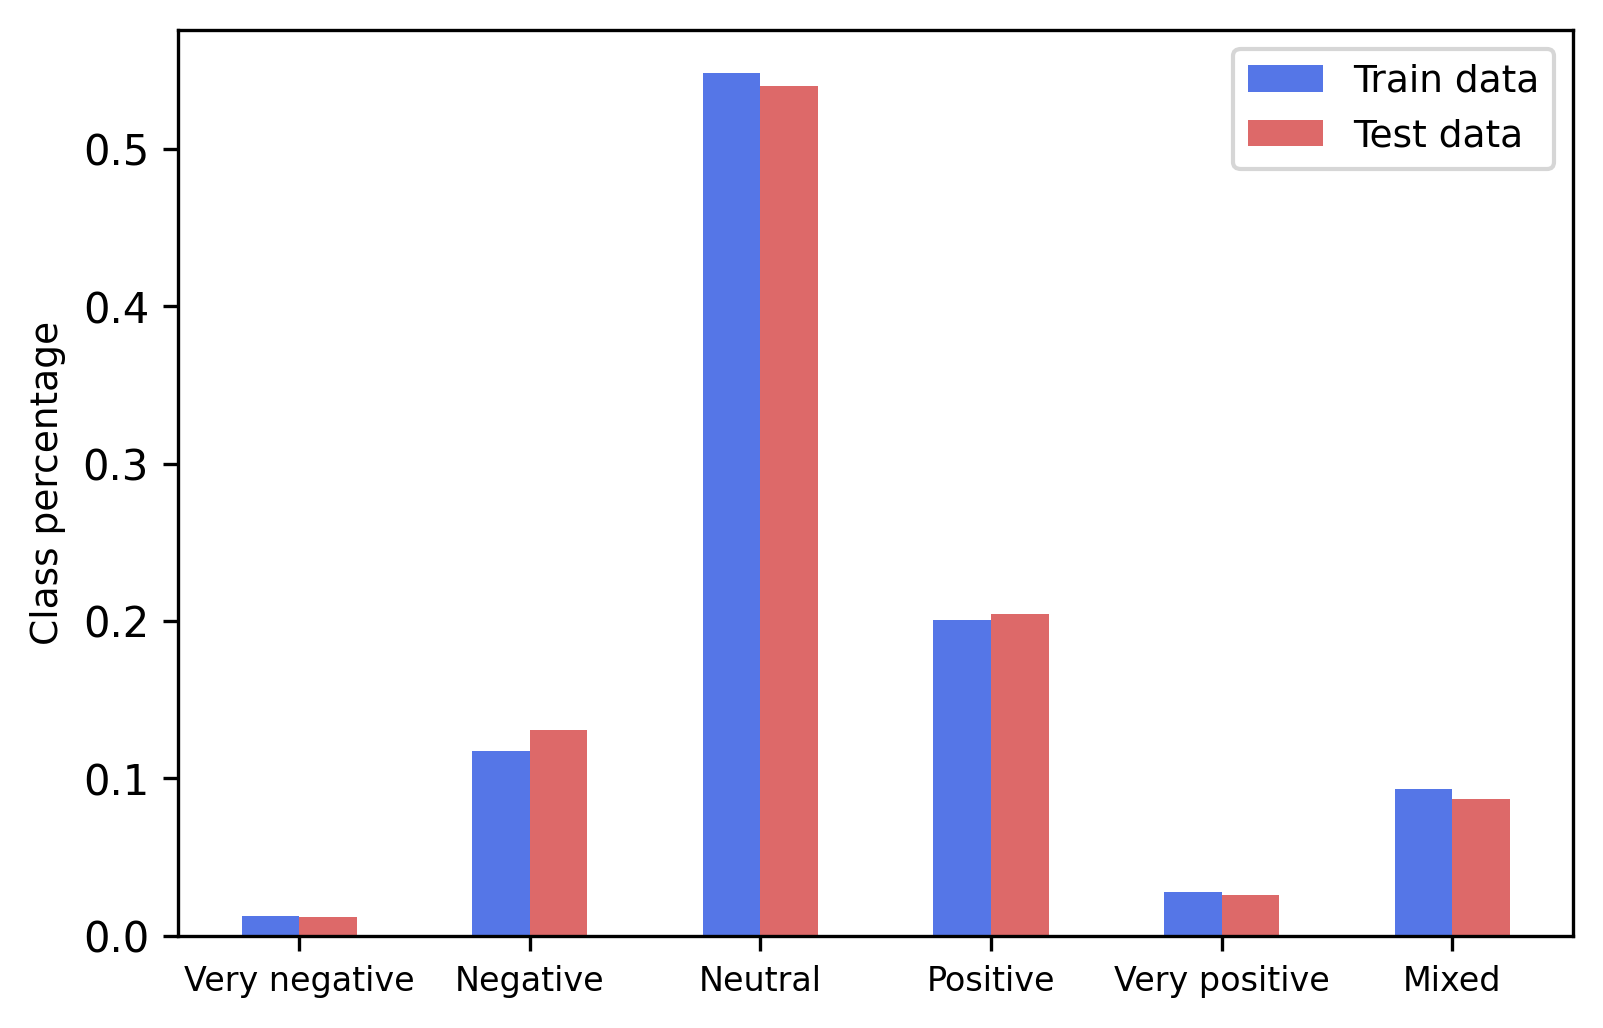

3368
842


In [4]:
fig = plt.figure()
axs = plt.gca()

fig.set_dpi(300)

width = 0.25
x = np.arange(len(class_names))
plt.bar(x - width/2, class_distribution_train, width, label='Train data', color="#5576e7")
plt.bar(x + width/2, class_distribution_test, width, label='Test data', color="#dd6969")

axs.set_ylabel('Class percentage', size = 9)
axs.set_xticks(x, class_names, size = 8)
plt.legend(loc="upper right", prop={'size': 9})
plt.show()

print(len(targets_train))
print(len(targets_test))